# Introduction

In this project, we will be looking at movie datasets in order to give recommendations to a new movie studio.

 - *Introduction explains the real-world problem the project aims to solve.*
 - *Introduction identifies stakeholders who could use the project and how they would use it.*



# Objectives (*Goals*)
 - Import datasets and do an initial viewing. (*Data*)
 - Ask some relevant questions! (*Methods*)
 - Find the answers to those questions (*Results*)
 - Conclusion

## Datasets
The data for this project comes from https://www.boxofficemojo.com/ and https://www.imdb.com/

### IMDB Dataset

First we are going to `import sqlite3` and `pandas`, along with some other packages we'll use later on. Then we will connect to the dataset and find the datasets table names. 

In [28]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
import zipfile

In [2]:
with zipfile.ZipFile('zipped_data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
# create connection to the database and cursor object:
conn = sql.connect('data/im.db')
cur = conn.cursor()
# find table names
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Above we see 8 tables names - lets look into those tables now.

For the `movie_basics` table:

In [4]:
# creating movie_basics dataframe
imbd_movie_basics = pd.read_sql("""SELECT * FROM movie_basics;
                                """, conn)
imbd_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None



For the `directors` table:

In [5]:
# creating a dataframe for the directors table
imbd_directors = pd.read_sql("""SELECT * FROM directors;
                                """, conn)
imbd_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248




For the `known_for` table:

In [6]:
# getting data and creating the dataframe for the known_for table
imbd_known_for = pd.read_sql("""SELECT * FROM known_for;
                                """, conn)
imbd_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


For the `movie_akas` table:

In [7]:
# creating the dataframe for the movie_akas table#
imbd_movie_akas = pd.read_sql("""SELECT * FROM movie_akas;
                                """, conn)
imbd_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


For the `movie_ratings` table:

In [8]:
# creating the dataframe for the movie_ratings table
imbd_movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;
                                """, conn)
imbd_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


For the `persons` table:

In [9]:
# creating the dataframe for the persons table
imbd_persons = pd.read_sql("""SELECT * FROM persons;
                                """, conn)
imbd_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


For the `principals` table:

In [10]:
# creating the dataframe for the principals table
imbd_principals = pd.read_sql("""SELECT * FROM principals;
                                """, conn)
imbd_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


For the `writers` table:

In [11]:
# creating the dataframe for the writers table
imbd_writers = pd.read_sql("""SELECT * FROM writers;
                                """, conn)
imbd_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


### Box Office Mojo (BOM) Dataset

First we are going to read, create a dataframe, and check the column value types for the BOM dataset (`bom_df`). 

In [12]:
bom_df = pd.read_csv('zipped_data/bom.movie_gross (1).csv.gz')
print(bom_df.dtypes)
bom_df

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Questions about the data:

- Do certain genres result in higher grossing films?
- Is there a connection between specific actors and higher grossing films?
- Do movies with higher ratings result in higher grossing films?

Hopefully, after answering these questions we will have some reccomendations for movie studios to help direct them on how to make high-grossing, successfull films!

### Do certain genres result in higher grossing films?
In order to answer this question we need to make sure our datatypes are the way we want them.

Lets start by saving `bom_df` in a SQLite database, so that we can then use SQLite to join and query the `bom_df` data set and the `imbd_movie_basics` data set.

In [13]:
bom_df.to_sql('bom_df', conn)

Now we can query `bom_df` using SQLite.

In [14]:
 pd.read_sql("""SELECT * FROM bom_df;
                                """, conn)

,index,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200.0,None,2018
3383,3383,Edward II (2018 re-release),FM,4800.0,None,2018
3384,3384,El Pacto,Sony,2500.0,None,2018
3385,3385,The Swan,Synergetic,2400.0,None,2018


Now we're going to join the two tables based on movie title and year.

In [15]:
bom_movie_basics_joined = pd.read_sql('''
    SELECT bom_df.title, bom_df.domestic_gross, bom_df.foreign_gross, movie_basics.genres, bom_df.year
    FROM bom_df
        INNER JOIN movie_basics
        ON bom_df.title=movie_basics.original_title AND bom_df.year=movie_basics.start_year
    ORDER BY foreign_gross DESC;
''', conn)
bom_movie_basics_joined

,title,domestic_gross,foreign_gross,genres,year
0,The East,2300000.0,99700,"Adventure,Drama,Thriller",2013
1,White Lion,NaN,99600,"Drama,Family",2010
2,Sea Rex 3D: Journey to a Prehistoric World,6100000.0,9900000,Documentary,2010
3,Le Havre,612000.0,9900000,"Comedy,Drama",2011
4,Only God Forgives,779000.0,9900000,"Crime,Drama",2013
...,...,...,...,...,...
1661,The House That Jack Built,88000.0,None,"Crime,Drama,Horror",2018
1662,Helicopter Eela,72000.0,None,Drama,2018
1663,Oolong Courtyard,37700.0,None,Comedy,2018
1664,The Workshop,22100.0,None,Thriller,2018


In [16]:
bom_movie_basics_joined[bom_movie_basics_joined["title"].duplicated()]

,title,domestic_gross,foreign_gross,genres,year
29,The Night Before,43000000.0,9300000,Documentary,2015
49,The Artist,44700000.0,88800000,Thriller,2011
85,Lights Out,67300000.0,81600000,"Drama,Horror,Mystery",2016
169,The Bounty Hunter,67099999.0,69300000,"Action,Comedy,Romance",2010
177,The Tempest,278000.0,68700,Drama,2010
215,Gone,11700000.0,6400000,Drama,2012
263,Coco,209700000.0,597400000,Horror,2017
308,Abduction,28100000.0,54000000,"Horror,Thriller",2011
313,Truth or Dare,41400000.0,53900000,"Horror,Thriller",2018
324,Spotlight,45100000.0,53200000,Drama,2015


We can use `.shape` to find the number of duplicated rows:

In [17]:
bom_movie_basics_joined[bom_movie_basics_joined["title"].duplicated()].shape

(36, 5)

So we have 1666 rows in our complete joined file, and 36 duplicated rows within that. Accounting for the duplication, that means that around 72 lines are doubled. 72/1666 equals to a bit more than 4%. Since it's impossible without incorperating more data to tell these duplicated movies apart (and make sure the right profits/genres are ascribed to the right movie), I'm going to delete all of them from our dataset.  

In [18]:
bom_movie_basics_joined.drop_duplicates(subset=['title', 'year'], keep=False, inplace=True)
bom_movie_basics_joined

,title,domestic_gross,foreign_gross,genres,year
0,The East,2300000.0,99700,"Adventure,Drama,Thriller",2013
1,White Lion,NaN,99600,"Drama,Family",2010
2,Sea Rex 3D: Journey to a Prehistoric World,6100000.0,9900000,Documentary,2010
3,Le Havre,612000.0,9900000,"Comedy,Drama",2011
4,Only God Forgives,779000.0,9900000,"Crime,Drama",2013
...,...,...,...,...,...
1661,The House That Jack Built,88000.0,None,"Crime,Drama,Horror",2018
1662,Helicopter Eela,72000.0,None,Drama,2018
1663,Oolong Courtyard,37700.0,None,Comedy,2018
1664,The Workshop,22100.0,None,Thriller,2018


Okay! Now that our data set has been cleaned a little bit, lets get back to our origional question; Do certain genres result in higher grossing films? In order to look at this, we will need to seperate the listed genres.


In [19]:
bom_movie_basics_joined['genres'] = bom_movie_basics_joined['genres'].str.split(pat=',')
bom_movie_basics_exploded = bom_movie_basics_joined.explode('genres', ignore_index=True)

Now lets take a look at our data:

In [20]:
print(bom_movie_basics_exploded.dtypes)
bom_movie_basics_exploded

title              object
domestic_gross    float64
foreign_gross      object
genres             object
year                int64
dtype: object


,title,domestic_gross,foreign_gross,genres,year
0,The East,2300000.0,99700,Adventure,2013
1,The East,2300000.0,99700,Drama,2013
2,The East,2300000.0,99700,Thriller,2013
3,White Lion,NaN,99600,Drama,2010
4,White Lion,NaN,99600,Family,2010
...,...,...,...,...,...
4000,The House That Jack Built,88000.0,None,Horror,2018
4001,Helicopter Eela,72000.0,None,Drama,2018
4002,Oolong Courtyard,37700.0,None,Comedy,2018
4003,The Workshop,22100.0,None,Thriller,2018


Whoops! `foreign_gross` is an object, not an integer- lets change that.


In [21]:
# getting rid of commas before we make the transformation
bom_movie_basics_exploded['foreign_gross'] = bom_movie_basics_exploded['foreign_gross'].str.replace(',','')
# transforming the string object into an integer
bom_movie_basics_exploded = bom_movie_basics_exploded.astype({'foreign_gross': np.float})
# checking to see if it worked
bom_movie_basics_exploded.dtypes


title              object
domestic_gross    float64
foreign_gross     float64
genres             object
year                int64
dtype: object

Yey! It worked! We may need to use the `bom_movie_basics_joined` later on as well, so lets run it throught the same code:

In [22]:
# getting rid of commas before we make the transformation
bom_movie_basics_joined['foreign_gross'] = bom_movie_basics_joined['foreign_gross'].str.replace(',','')
# transforming the string object into an integer
bom_movie_basics_joined = bom_movie_basics_joined.astype({'foreign_gross': np.float})
# checking to see if it worked
bom_movie_basics_joined.dtypes

title              object
domestic_gross    float64
foreign_gross     float64
genres             object
year                int64
dtype: object

Okay! So now we have a full workable list of the movies and their genres. 
Lets find the average amount each genre made in the dataset.

In [23]:
bom_movie_basics_exploded_avg= bom_movie_basics_exploded.groupby(['genres']).foreign_gross.mean().reset_index()
bom_movie_basics_exploded_avg




,genres,foreign_gross
0,Action,1.591982e+08
1,Adventure,2.297876e+08
2,Animation,2.518275e+08
3,Biography,4.951967e+07
4,Comedy,8.502199e+07
5,Crime,4.157536e+07
6,Documentary,1.201011e+07
7,Drama,4.738446e+07
8,Family,9.907607e+07
9,Fantasy,1.643918e+08


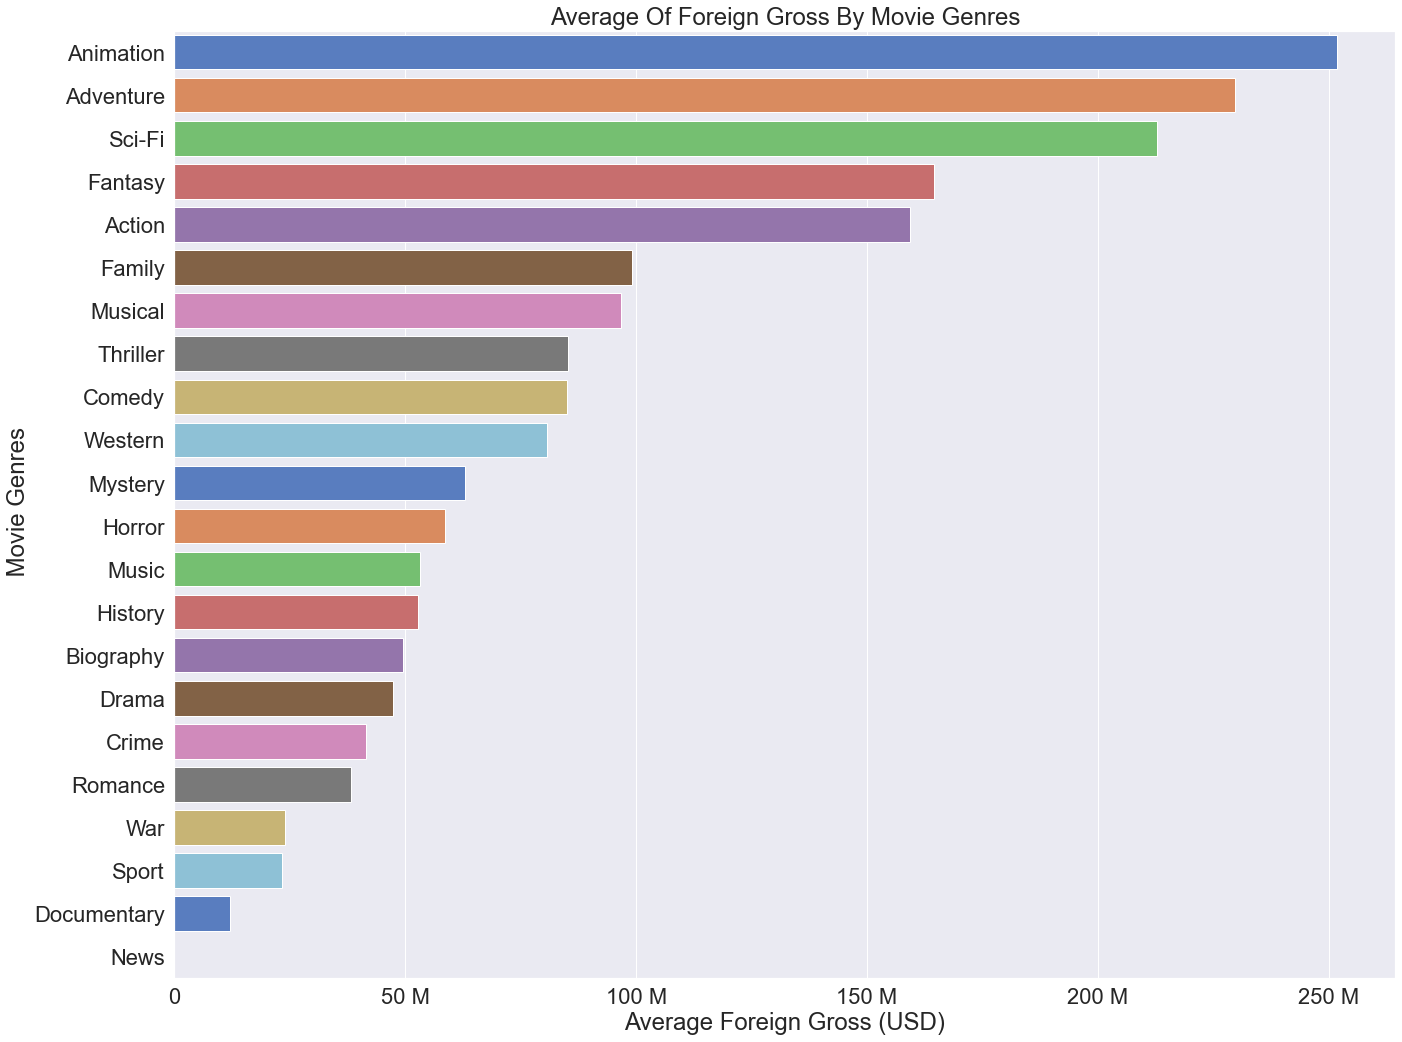

In [50]:
# specify size of plot
fig, ax = plt.subplots(figsize=(20, 15))
# increase font size of all elements
sns.set(font_scale=2)
# create bar plot
sns.barplot(data=bom_movie_basics_exploded_avg.sort_values(by='foreign_gross', ascending=False), 
            x='foreign_gross', 
            y='genres',
            ci = None,
            palette='muted').set(title='Average Of Foreign Gross By Movie Genres')
# lable axes
ax.set(xlabel='Average Foreign Gross (USD)', ylabel=' Movie Genres')
# get rid of scientific notation
#plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show();



#### Answer: Do certain genres result in higher grossing films?

Based on the above graph, we see that on average, **animated** films have made the most out of all the genres, followed by **adventure**, **sci-fi**, **fantasy**, and **action**. As such, I would advise Microsoft to focus on these 5 genres in their initial films for their new movie studio.

### Is there a correlation between specific actors and higher grossing films?